# Dashboard
Análisis de comportamiento de los pitchers de mlb en la temporada 2022

 Importamos las librerias luego de haberlas instalado en la terminal 

In [1]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [3]:
import streamlit as st
import pandas as pd

In [4]:
df = pd.read_csv('2022 MLB Player Stats - Pitching.csv', sep=';',  encoding="latin-1")
df

,Rk,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1,Cory Abbott,26,WSN,NL,0,5,0.000,5.25,16,...,2,216,75,6.36,1.438,8.3,2.3,4.7,8.4,1.80
1,2,Albert Abreu,26,TOT,AL,2,2,0.500,3.26,33,...,6,172,123,4.77,1.474,8.1,1.2,5.1,8.8,1.73
2,3,Albert Abreu,26,TEX,AL,0,0,0.000,3.12,7,...,0,42,133,8.54,1.846,4.2,2.1,12.5,9.3,0.75
3,4,Albert Abreu,26,KCR,AL,0,0,0.000,4.15,4,...,1,22,106,8.19,2.308,12.5,2.1,8.3,6.2,0.75
4,5,Albert Abreu,26,NYY,AL,2,2,0.500,3.16,22,...,5,108,124,2.92,1.208,8.8,0.7,2.1,9.1,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1077,Rob Zastryzny*,30,NYM,NL,0,0,0.000,9.00,1,...,0,4,60,1.11,1.000,9.0,0.0,0.0,9.0,0.00
1077,1078,Rob Zastryzny*,30,LAA,AL,0,0,0.000,6.00,5,...,1,12,76,2.78,1.000,6.0,0.0,3.0,6.0,2.00
1078,1079,Angel Zerpa*,22,KCR,AL,2,1,0.667,1.64,3,...,1,44,255,5.75,1.091,7.4,1.6,2.5,2.5,1.00
1079,1080,T.J. Zeuch,26,CIN,NL,0,3,0.000,15.19,3,...,0,64,30,11.08,2.906,20.3,4.2,5.9,4.2,0.71


In [5]:
print(len(df.columns))
df.columns.tolist()   # Te dice cuántas columnas tiene

35


['Rk',
 'Name',
 'Age',
 'Tm',
 'Lg',
 'W',
 'L',
 'W-L%',
 'ERA',
 'G',
 'GS',
 'GF',
 'CG',
 'SHO',
 'SV',
 'IP',
 'H',
 'R',
 'ER',
 'HR',
 'BB',
 'IBB',
 'SO',
 'HBP',
 'BK',
 'WP',
 'BF',
 'ERA+',
 'FIP',
 'WHIP',
 'H9',
 'HR9',
 'BB9',
 'SO9',
 'SO/W']

In [6]:

# Verificamos si hay valores nulos
st.write(df.isnull().sum())
# Eliminamos filas con valores nulos
df.dropna(inplace=True)
st.write(df.isnull().sum())
st.write(df.shape)
# Reiniciamos el índice después de eliminar filas
df.reset_index(drop=True, inplace=True)
st.write(df.shape)
st.write(df.head())



2025-10-22 17:23:13.635 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.083 
  command:

    streamlit run C:\Users\Windows 11\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-22 17:23:14.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.083 Thread 'MainThread': missing ScriptRunContext! This warning can 

In [7]:
df

,Rk,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1,Cory Abbott,26,WSN,NL,0,5,0.000,5.25,16,...,2,216,75,6.36,1.438,8.3,2.3,4.7,8.4,1.80
1,2,Albert Abreu,26,TOT,AL,2,2,0.500,3.26,33,...,6,172,123,4.77,1.474,8.1,1.2,5.1,8.8,1.73
2,3,Albert Abreu,26,TEX,AL,0,0,0.000,3.12,7,...,0,42,133,8.54,1.846,4.2,2.1,12.5,9.3,0.75
3,4,Albert Abreu,26,KCR,AL,0,0,0.000,4.15,4,...,1,22,106,8.19,2.308,12.5,2.1,8.3,6.2,0.75
4,5,Albert Abreu,26,NYY,AL,2,2,0.500,3.16,22,...,5,108,124,2.92,1.208,8.8,0.7,2.1,9.1,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1077,Rob Zastryzny*,30,NYM,NL,0,0,0.000,9.00,1,...,0,4,60,1.11,1.000,9.0,0.0,0.0,9.0,0.00
1077,1078,Rob Zastryzny*,30,LAA,AL,0,0,0.000,6.00,5,...,1,12,76,2.78,1.000,6.0,0.0,3.0,6.0,2.00
1078,1079,Angel Zerpa*,22,KCR,AL,2,1,0.667,1.64,3,...,1,44,255,5.75,1.091,7.4,1.6,2.5,2.5,1.00
1079,1080,T.J. Zeuch,26,CIN,NL,0,3,0.000,15.19,3,...,0,64,30,11.08,2.906,20.3,4.2,5.9,4.2,0.71


In [8]:
columnas_necesarias = ['Name', 'Age', 'Tm', 'W', 'L', 'ERA', 'G', 'IP', 'FIP', 'WHIP']
df_filtrado = df[columnas_necesarias]
print(df_filtrado)
df_filtrado.columns = ['Name', 'Age', 'Team', 'W', 'L', 'ERA', 'G', 'IP', 'FIP', 'WHIP']
print(df_filtrado) 

                   Name  Age   Tm  W  L    ERA   G    IP    FIP   WHIP
0           Cory Abbott   26  WSN  0  5   5.25  16  48.0   6.36  1.438
1          Albert Abreu   26  TOT  2  2   3.26  33  38.2   4.77  1.474
2          Albert Abreu   26  TEX  0  0   3.12   7   8.2   8.54  1.846
3          Albert Abreu   26  KCR  0  0   4.15   4   4.1   8.19  2.308
4          Albert Abreu   26  NYY  2  2   3.16  22  25.2   2.92  1.208
...                 ...  ...  ... .. ..    ...  ..   ...    ...    ...
1076     Rob Zastryzny*   30  NYM  0  0   9.00   1   1.0   1.11  1.000
1077     Rob Zastryzny*   30  LAA  0  0   6.00   5   3.0   2.78  1.000
1078       Angel Zerpa*   22  KCR  2  1   1.64   3  11.0   5.75  1.091
1079         T.J. Zeuch   26  CIN  0  3  15.19   3  10.2  11.08  2.906
1080  Bruce Zimmermann*   27  BAL  2  5   5.99  15  73.2   6.06  1.480

[1081 rows x 10 columns]
                   Name  Age Team  W  L    ERA   G    IP    FIP   WHIP
0           Cory Abbott   26  WSN  0  5   5.25  16 

Filtro para rango de edad vs entradas lanzadas 

In [9]:
#Filtro de rango de edad con innings lanzados mayor a 50
df_limpio = df_filtrado[
    (df_filtrado['Age'] >= 20) &
    (df_filtrado['Age'] <= 50) &
    (df_filtrado['IP'] > 50)
]
df.reset_index(drop=True, inplace=True)
df_limpio

,Name,Age,Team,W,L,ERA,G,IP,FIP,WHIP
5,Bryan Abreu,25,HOU,4,0,1.94,55,60.1,2.12,1.177
6,Domingo Acevedo,28,OAK,4,4,3.33,70,67.2,4.01,0.990
7,Jason Adam,30,TBR,2,3,1.56,67,63.1,2.86,0.758
9,Joan Adon,23,WSN,1,12,7.10,14,64.2,5.11,1.778
12,Keegan Akin*,27,BAL,3,3,3.20,45,81.2,3.59,1.090
...,...,...,...,...,...,...,...,...,...,...
1054,Alex Wood*,31,SFG,8,12,5.10,26,130.2,3.76,1.240
1056,Brandon Woodruff,29,MIL,13,4,3.05,27,153.1,3.08,1.070
1059,Kyle Wright,26,ATL,21,5,3.19,30,180.1,3.58,1.159
1065,Ryan Yarbrough*,30,TBR,3,8,4.50,20,80.0,4.77,1.375


Esto se hace para centrar el dataset y aislar datos atipicos 

In [10]:
#Quiero saber cual es el pitcher mas joven y el mas viejo
pitcher_mas_joven = df.loc[df['Age'].idxmin()]
pitcher_mas_viejo = df.loc[df['Age'].idxmax()]
st.write("Pitcher más joven:")
st.write(pitcher_mas_joven)
st.write("Pitcher más viejo:")      
st.write(pitcher_mas_viejo)
st.write(df['Age'].min())   
st.write(df['Age'].max())


2025-10-22 17:23:14.202 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.204 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.205 Serialization of dataframe to Arrow table was unsuccessful. Applying automatic fixes for column types to make the dataframe Arrow-compatible.
Traceback (most recent call last):
  File "c:\Users\Windows 11\AppData\Local\Programs\Python\Python312\Lib\site-packages\streamlit\dataframe_util.py", line 822, in convert_pandas_df_to_arrow_bytes
    table = pa.Table.from_pandas(df)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "pyarrow\\table.pxi", line 4795, in pyarrow.lib.Table.from_pandas
  File "c:\Users\Windows 11\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyarrow\pandas_compat.py",

In [11]:
df['Categoria'] = df['Age'].apply(lambda x: 'Veterano' if x > 30 else 'Joven')
df.to_csv('pitcheo.csv', index=False)
df['Categoria']
# resumen de cuantos pitchers hay en cada categoria
(df['Categoria'].value_counts())


Categoria
Joven       787
Veterano    294
Name: count, dtype: int64

In [12]:
#Barra lateral de streamlit para seleccionar equipo y columnas estadísticas
st.title("📊 Estadísticas de Jugadores por Equipo")

# 🎯 Selección de equipo
equipos = df_limpio['Team'].unique()
equipo_seleccionado = st.sidebar.selectbox("Selecciona un equipo", equipos)

# 🧩 Selección de columnas estadísticas
columnas_disponibles = df_limpio.columns.drop(['Name', 'Team'])  # Excluye nombre y equipo
columnas_seleccionadas = st.sidebar.multiselect(
    "Selecciona estadísticas a mostrar",
    columnas_disponibles,
    default=columnas_disponibles  # Opcional: mostrar todas por defecto
)

# 📌 Filtrar DataFrame por equipo
df_equipo = df_limpio[df_limpio['Team'] == equipo_seleccionado][['Name'] + columnas_seleccionadas]

# Mostrar resultados
st.subheader(f"Jugadores del equipo {equipo_seleccionado}")
st.dataframe(df_equipo.reset_index(drop=True))


2025-10-22 17:23:14.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.282 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 17:23:14.283 Session state does not function when running a script without `streamlit run`
2025-10-22 17:23

DeltaGenerator()

# Graficos por objetivos 

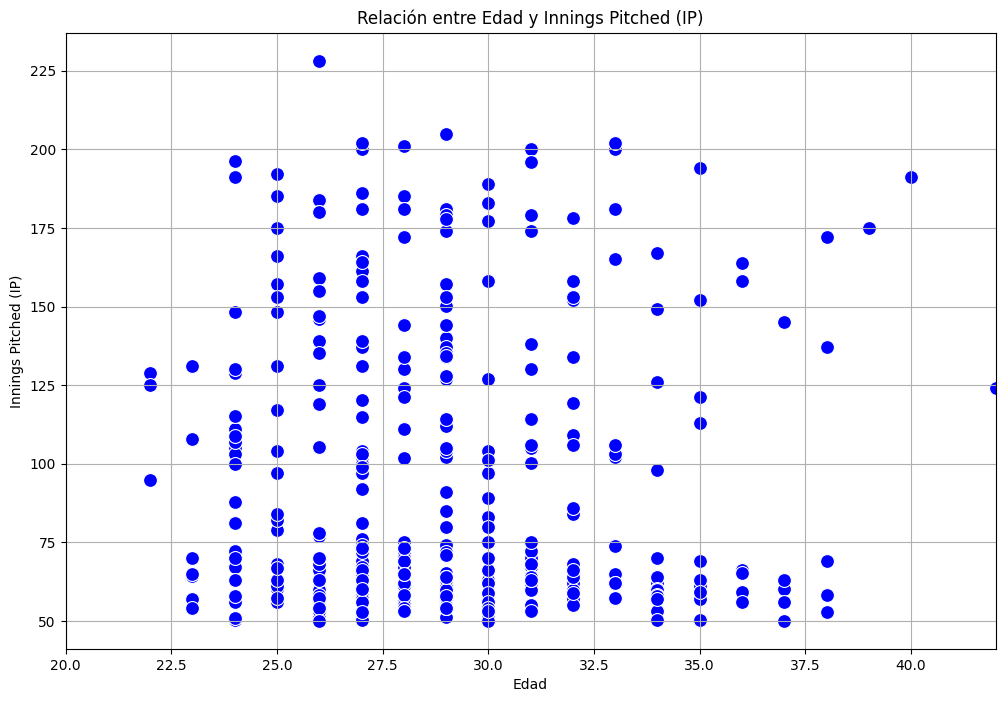

In [ ]:
#Grafico objetivo: Relacion Edad vs Innings Pitched (IP)
df_fig1 = df[(df['Age'] > 20) & (df['IP'] > 50)]

# Crear gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_fig1, x='Age', y='IP', color='blue', s=100)

# Títulos y etiquetas
plt.title('Relación entre Edad y Innings Pitched (IP)')
plt.xlabel('Edad')
plt.ylabel('Innings Pitched (IP)')

# Estética
plt.grid(True)
plt.xlim(20, 42)

# Mostrar
plt.show()


Luego de ver donde esta la concentracion de juegos pitcheados por edad podriamos ver un rango claro entre 25 y 33 años, donde se concentran los pitchers con mas innings pitcheados 

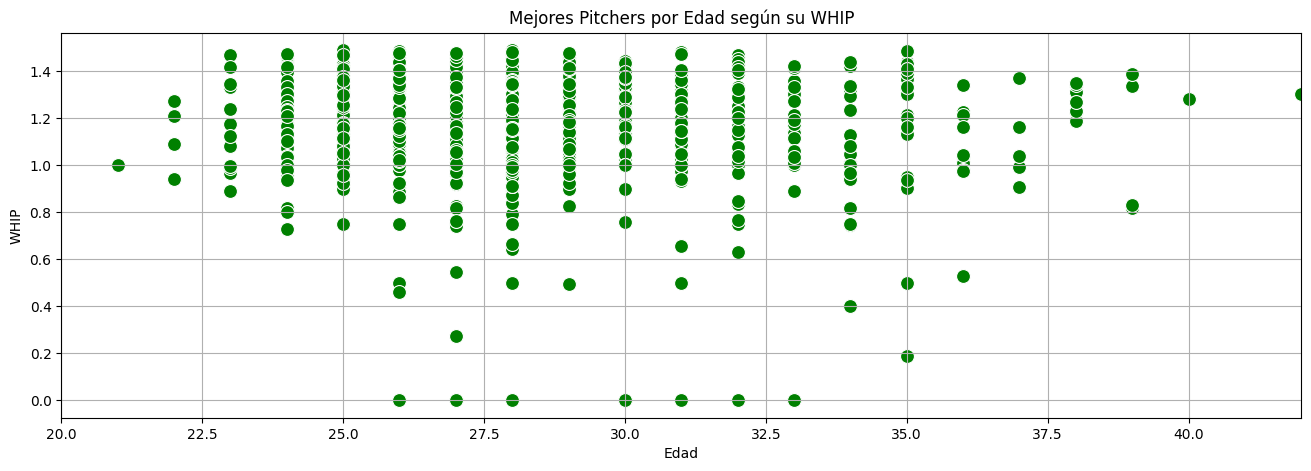

In [ ]:
#Grafico objetivo: Rango de mejores pitchers por edad según su whip
df_fig2 = df[(df['Age'] > 20) & (df['WHIP'] < 1.5)]
# Crear gráfico de dispersión
plt.figure(figsize=(16, 5))
sns.scatterplot(data=df_fig2, x='Age', y='WHIP', color='green', s=100)
# Títulos y etiquetas
plt.title('Mejores Pitchers por Edad según su WHIP')
plt.xlabel('Edad')
plt.ylabel('WHIP')
plt.grid(True)
plt.xlim(20, 42)
# Mostrar
plt.show()

Un whip por debajo de 1.00 se considera excelente, mientras que un whip que se encuentra cercano a 1.5 se considera promedio.  Se ve como entre 25 y 35 años se encuentran los pitchers con mejor whip.

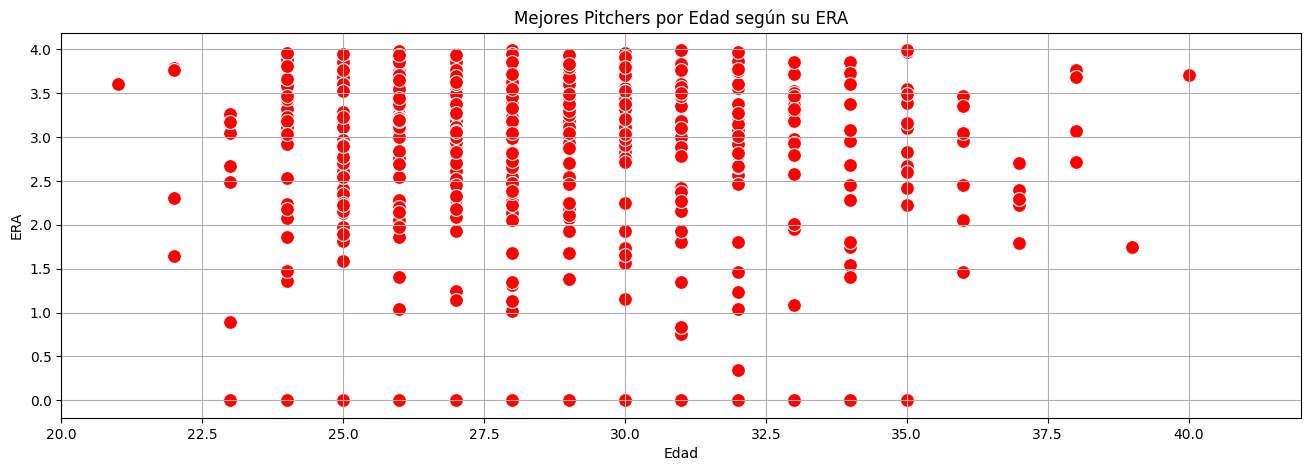

In [21]:
#Objetivo 2: Rango de mejores pitchers por edad según su ERA
df_fig3 = df[(df['Age'] > 20) & (df['ERA'] < 4.00)]
# Crear gráfico de dispersión       
plt.figure(figsize=(16, 5))
sns.scatterplot(data=df_fig3, x='Age', y='ERA', color='red', s=100)
# Títulos y etiquetas
plt.title('Mejores Pitchers por Edad según su ERA')
plt.xlabel('Edad')
plt.ylabel('ERA')
plt.grid(True)
plt.xlim(20, 42)
# Mostrar
plt.show()

Para la MLB, una ERA por debajo de 4.00 se considera buena, y una por debajo de 3.00 es de nivel élite. Una ERA de 2.00 o menos es excepcional. 

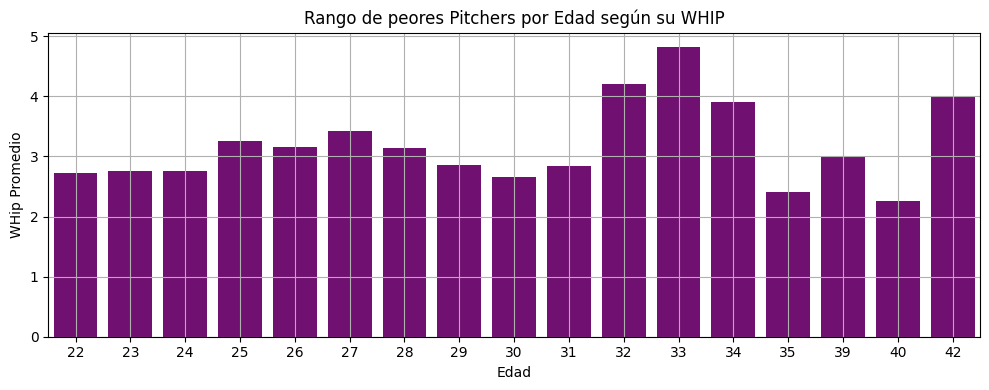

In [34]:
# Filtrar los peores pitchers
df_fig4 = df[(df['Age'] > 20) & (df['WHIP'] > 2.00)]

# Verificar si hay datos
if df_fig4.empty:
    print("No hay datos que cumplan con los criterios seleccionados.")
else:
    # Agrupar por edad y calcular el promedio de ERA
    df_grouped = df_fig4.groupby('Age')['WHIP'].mean().reset_index()

    # Crear gráfico de barras
    plt.figure(figsize=(10 , 4))
    sns.barplot(data=df_grouped, x='Age', y='WHIP', color='purple')

    # Títulos y etiquetas
    plt.title('Rango de peores Pitchers por Edad según su WHIP')
    plt.xlabel('Edad')
    plt.ylabel('WHip Promedio')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

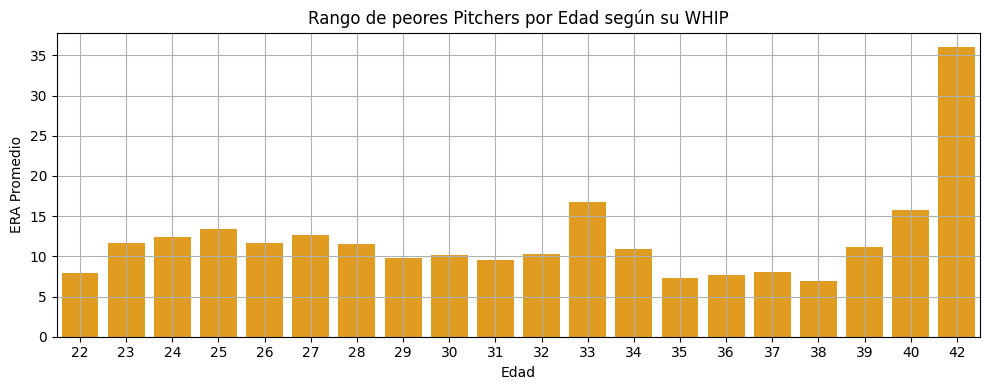

In [35]:
# Filtrar los peores pitchers
df_fig5 = df[(df['Age'] > 20) & (df['ERA'] > 6.00)]

# Verificar si hay datos
if df_fig5.empty:
    print("No hay datos que cumplan con los criterios seleccionados.")
else:
    # Agrupar por edad y calcular el promedio de ERA
    df_grouped = df_fig5.groupby('Age')['ERA'].mean().reset_index()

    # Crear gráfico de barras
    plt.figure(figsize=(10, 4))
    sns.barplot(data=df_grouped, x='Age', y='ERA', color='orange')

    # Títulos y etiquetas
    plt.title('Rango de peores Pitchers por Edad según su WHIP')
    plt.xlabel('Edad')
    plt.ylabel('ERA Promedio')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Los 10 mejores pitchers por WHIP:
